<a href="https://colab.research.google.com/github/shirisha0920/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
dataset = pd.read_csv("Boston.csv")

In [ ]:
dataset

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
dataset.shape

(506, 15)

In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


<Axes: >

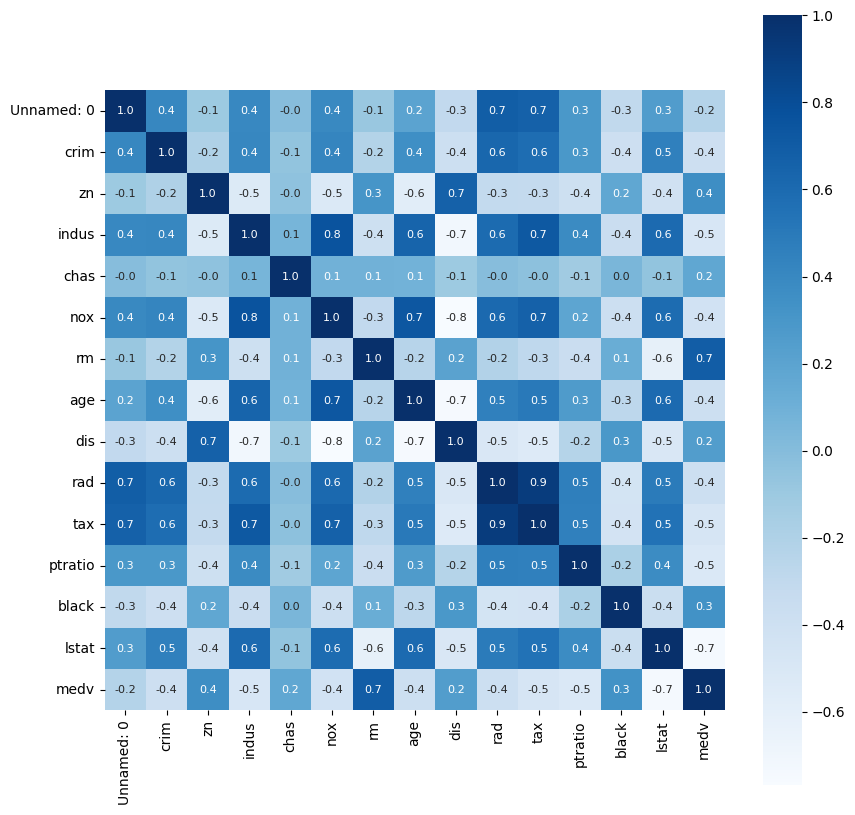

In [ ]:
Correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
x = dataset.drop('medv',axis=1)
y = dataset['medv']

In [ ]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
x

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(506, 14) (404, 14) (102, 14)


In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_prediction = model.predict(x_train)

In [ ]:
model_prediction

array([33.08450419, 40.13016647,  9.68149295, 28.76819372, 20.00150898,
       19.68248114, 19.16764455, 36.43579949, 24.90990274, 20.3404684 ,
       20.34723603, 19.68737115, 14.41957631, 25.8356408 , 31.86574505,
       18.31793866, 29.2413596 ,  0.89556513, 19.82905081, 25.43874877,
       34.64103124, 28.2822896 , 14.47832615, 18.31008925, 16.24174375,
       27.59481349, 16.07116825,  3.40373639, 31.42845778, 16.27035732,
       15.80174618, 24.09935916, 24.68118892, 30.27946105, 35.27358275,
       15.16593956, 12.90978994, 16.28331335, 40.83307063, 19.30608207,
       18.93508502, 26.93230834, 16.16353737, 44.15847143, 21.1368664 ,
       18.29610846, 18.6120625 , 15.45037202, 20.84825396, 16.5373745 ,
       23.98876764, 26.75032127, 25.15331146, 14.69503713, 19.45782198,
       31.33881185, 27.24507735, 35.84338658, 14.71859897, 12.803407  ,
       40.91804924,  9.24281087, 26.79457552, 21.33995724, 28.32750755,
       17.57367739, 31.3077087 , 29.92520113, 25.84673127, 20.74

In [ ]:
score1 = metrics.r2_score(model_prediction,y_train)
print("R2 Score :",score1)

R2 Score : 0.6276846569697577


In [ ]:
score2 = metrics.mean_absolute_error(model_prediction,y_train)
print("Mean Absolute Error :",score2)

Mean Absolute Error : 3.387399554794727


In [ ]:
model2 = XGBRegressor()

In [ ]:
model2.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_prediction = model2.predict(x_train)

In [ ]:
score1 = metrics.r2_score(model_prediction,y_train)
print("R2 Score :",score1)

R2 Score : 0.9999963629525462


In [ ]:
score2 = metrics.mean_absolute_error(model_prediction,y_train)
print("Mean Absolute Error :",score2)

Mean Absolute Error : 0.012244778340405738


In [ ]:
input = np.array([[2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14]])
model.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.32441865])

In [ ]:
input = np.array([[2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14]])
model2.predict(input)

array([21.60022], dtype=float32)

In [ ]:
import pickle
pickle.dump(model,open('House_Price_Prediction.pkl',"wb"))